In [1]:
import torch
from data import Data
from train import train
from LSTM import LSTM
import matplotlib.pyplot as plt


In [ ]:

data = Data()
model = LSTM(len(data.vocab), 128, len(data.categories))
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
losses = []



Arabic
Chinese
Czech
Dutch
English
French
German
Greek
Irish
Italian
Japanese
Korean
Polish
Portuguese
Russian
Scottish
Spanish
Vietnamese


In [3]:
"".join(data.vocab)

',:ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [4]:
train(
    model,
    criterion,
    optimizer,
    epochs=100000,
    data=data,
    losses=losses
)

Iterations: 500 | loss: 2.8925295691490174
Iterations: 1000 | loss: 2.8756952147483825
Iterations: 1500 | loss: 2.88132542514801
Iterations: 2000 | loss: 2.8522292606830595
Iterations: 2500 | loss: 2.873720687866211
Iterations: 3000 | loss: 2.8809553771018983
Iterations: 3500 | loss: 2.825789343357086
Iterations: 4000 | loss: 2.832734717845917
Iterations: 4500 | loss: 2.839768885374069
Iterations: 5000 | loss: 2.7451614274978637
Iterations: 5500 | loss: 2.773200291633606
Iterations: 6000 | loss: 2.7572862021923066
Iterations: 6500 | loss: 2.7306957201957704
Iterations: 7000 | loss: 2.7315063831806183
Iterations: 7500 | loss: 2.724660339832306
Iterations: 8000 | loss: 2.6464651486873625
Iterations: 8500 | loss: 2.6376921520233156
Iterations: 9000 | loss: 2.6890554387569425
Iterations: 9500 | loss: 2.6400579566955567
Iterations: 10000 | loss: 2.626562052965164
Iterations: 10500 | loss: 2.655106727838516
Iterations: 11000 | loss: 2.6047002918720246
Iterations: 11500 | loss: 2.638072459459

KeyboardInterrupt: 

In [ ]:
def predict(model, input, data):
    tensor = data.word2tensor(input)
    hidden_state = model.init_hidden()

    for ch in range(tensor.shape[0]):
        output, hidden_state = model(tensor[ch], hidden_state)

    category = data.tensor2category(torch.tensor([torch.argmax(output)], dtype=torch.long))
    return category

# predict(model, "Luka Modric\n", data)


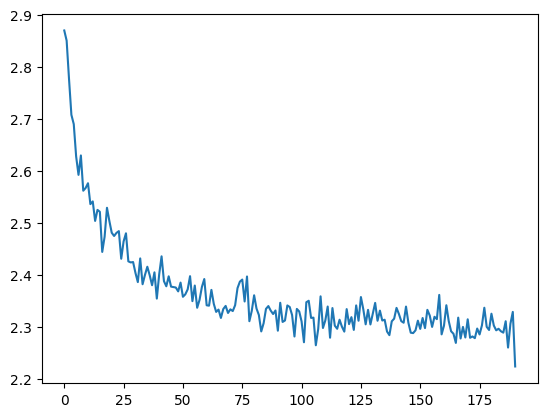

In [ ]:
plt.plot(range(len(losses)), losses)

In [ ]:
while True:
    inp = input("> ")
    if inp.lower() == "quit":
        break

    category = predict(model, f"{inp}\n", data)
    print(category)

Arabic
